# Instructions and Remarks #

*   Download this Jupyter Notebook and upload it on google drive. Then, open and run via google collab.
*   A large dataset will be downloaded for this project. Among the data, you may choose the number of samplongs that you may use when running the notebook.

# Objective #


1.   First, we will collect various samples of the COCO dataset and filter out the nouns for each sample.
2.   Then, we will filter out the nouns and compare it with each other, and measure the cosine similarity.
3. We will then show a graphical representation of how similar the items are.

![alt text](https://miro.medium.com/max/442/1*UODvtQMybHE8c0eL3K5z5A.png)


   4.  We will then proceed to use the training samples and predict how well the nouns are predicted, with the information of how "similar" the nouns are, which we retrieved from finding the cosine similarity.
   5. We will also show a graphical representation of such, to draw conclusions.


![alt text](https://miro.medium.com/max/886/1*yiH5sZI-IBxDSQMKhvbcHw.png)

# Import Statements #

We will first import the appropriate modules which we will be using right now.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [72]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
print("Imported")

Imported


# Import Dataset #

We will download the COCO dataset.

> Indented block



In [0]:
annotation_folder = '/annotations/'
if not os.path.exists(os.path.abspath('.') + annotation_folder):
  annotation_zip = tf.keras.utils.get_file('captions.zip',
                                          cache_subdir=os.path.abspath('.'),
                                          origin = 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip',
                                          extract = True)
  annotation_file = os.path.dirname(annotation_zip)+'/annotations/captions_train2014.json'
  os.remove(annotation_zip)
image_folder = '/train2014/'
if not os.path.exists(os.path.abspath('.') + image_folder):
  image_zip = tf.keras.utils.get_file('train2014.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin = 'http://images.cocodataset.org/zips/train2014.zip',
                                      extract = True)
  PATH = os.path.dirname(image_zip) + image_folder
  os.remove(image_zip)
else:
  PATH = os.path.abspath('.') + image_folder

We will restrict the training size by setting up a certain limit. This case, we are using 10000 samples.

In [0]:
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

all_captions = []
all_img_name_vector = []

for annot in annotations['annotations']:
    caption = '<start> ' + annot['caption'] + ' <end>'
    image_id = annot['image_id']
    full_coco_image_path = PATH + 'COCO_train2014_' + '%012d.jpg' % (image_id)

    all_img_name_vector.append(full_coco_image_path)
    all_captions.append(caption)

train_captions, img_name_vector = shuffle(all_captions,
                                          all_img_name_vector,
                                          random_state=1)
num_examples = 10000
train_captions = train_captions[:num_examples]
img_name_vector = img_name_vector[:num_examples]

In [75]:
len(train_captions)
# type(train_captions)

10000

# Extracting the **Nouns** from the Restricted Dataset

Now that we have limited the datatset for training, we will construct an algorithm so that we are able to filter out the nouns.

We wil use NLTK library, to filter out the nouns.

Incase your NTLK packages are not downloaded, this jupyter notebook will allow you to download the 'punkt' package and the 'averaged_perceptron_tagger' package. 

If you already have the NLTK libraries, comment out "nltk.download()" portion below the import statement.

In [76]:
import nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# lines = [['lines is was some string of words'], ['My name is Jeff']]

def filter_nouns(data):
    i = 0
    nouns = None
    noun_list = []
    while i < len(data):
        lines = ''.join(data[i])
        # function to test if something is a noun
        is_noun = lambda pos: pos[:2] == 'NN'
        # do the nlp stuff
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        noun_list = [*noun_list, nouns]
        i += 1     
    return noun_list
    
filter_nouns(train_captions)

[['start', 'skateboarder', 'trick', 'skateboard', 'ramp', 'end', '>'],
 ['start', 'person', 'air', 'skis', 'end', '>'],
 ['start', 'wood', 'door', 'boards', 'end', '>'],
 ['start', 'A', 'Do', 'Enter', 'sign', 'road', 'stadium', 'end', '>'],
 ['start', '>', 'Small', 'child', 'chair', 'plate', 'end', '>'],
 ['start', '>', 'groups', 'people', 'toilet', 'area', 'end', '>'],
 ['start', 'hand', 'cellphone', 'end', '>'],
 ['start', '>', 'People', 'computers', 'student', 'room', 'end', '>'],
 ['start', '>', 'birds', 'field', 'end', '>'],
 ['start', 'man', 'cell', 'phone', 'park', 'end', '>'],
 ['start', 'A', 'group', 'men', 'table', 'microphones', 'speech', 'end', '>'],
 ['start', 'bathroom', 'toilet', 'sprayer', 'wall', 'end', '>'],
 ['start', 'A', 'woman', 'bench', 'phone', 'end', '>'],
 ['start', 'woman', 'clock', 'purse', 'market', 'end', '>'],
 ['start', 'surfer', 'hand', 'signal', 'end', '>'],
 ['start', 'A', 'cat', 'asphalt', 'end', '>'],
 ['start', '>', 'carrots', 'cut', 'squash', 'car

# Observing Scene Prediciton with Cosine and Soft cosine similarity # 

## Cosine Similarity Analysis ##

*TODO*

*The captions are a list of strings, convert to a list of lists and filter our the nouns from that list -- done*

*Find the cosine similarity between the lists*

*Add a new caption, remove a noun and see if our model can predict the possible noun associated with that catption* 

With the obtained list of lists which contains the nouns for each training set, we will now calculate the cosine similarity and plot a visual representation of how similar each captions are.

We will first construct a document-term matrix. 
https://www.machinelearningplus.com/nlp/cosine-similarity/

In [96]:
# Define the bag of captions 
import numpy as np
captions = filter_nouns(train_captions)

start


In [107]:
# import appropriate models
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def construct_matrix(document):   
    # Create the Document Term Matrix
    count_vectorizer = CountVectorizer(stop_words='english')
    count_vectorizer = CountVectorizer()
    
    # Filter out components that are not needed 
    i = 0
    df = None
    noun_list = []
    while i < len(document):
        j = 0        
        while j < len(document[i]):
          if document[i][j] == 'A':
            document[i].remove(document[i][j])            
          j += 1
        
        # Convert list of strings to natural language
        noun_str = ' '.join(document[i])
        noun_list = [*noun_list, noun_str]
        i += 1
    
    # Define the matrix
    sparse_matrix = count_vectorizer.fit_transform(noun_list)

    # Convert Sparse Matrix to Pandas Dataframe to see the word frequencies.
    doc_term_matrix = sparse_matrix.todense()
    
    # Label each row with the appropriate caption
    count = 0
    numbers = []
    while count < 10000:
        count += 1
        numbers = [*numbers, "Caption {}".format(len(numbers) + 1)]
    
    df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=[x for x in numbers]) 
    return df

matrix = construct_matrix(captions)
observations = np.shape(matrix)[0]
features = np.shape(matrix)[1]

print("The data has {} observations and {} features.".format(observations, \
                                                             features))
construct_matrix(captions)

The data has 10000 observations and 3442 features.


,51,abandon,accent,accents,accident,action,activities,ad,adult,adults,advertisement,advertiser,advertising,aeroplane,afghan,afternoon,ages,agility,ahead,air,aircraft,airline,airliner,airlines,airplane,airplanes,airport,airshow,airstrip,airy,aisle,alarm,alaska,album,alcohol,alert,alice,alien,all,allee,...,work,worker,workers,works,workshop,workspace,world,worm,woven,wrap,wrapper,wreaths,wrestling,writing,wrought,wwii,yacht,yachts,yak,yankee,yard,year,yellow,yells,yoga,yogurt,york,yound,young,younger,youth,yummy,zeberas,zebra,zebras,zebu,zipper,zone,zoo,zucchini
Caption 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Caption 2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Caption 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Caption 4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Caption 5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Caption 9996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Caption 9997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Caption 9998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Caption 9999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now that we have successfully generated a document term matrix, we will compute the cosine similarity and display the output, using sklearn.metrics.

In [108]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(matrix, matrix)
# print(np.shape(cos_sim))
print(cos_sim)

# [[1.         0.51480485 0.38890873]
#  [0.51480485 1.         0.38829014]
#  [0.38890873 0.38829014 1.        ]]

[[1.        0.2236068 0.2236068 ... 0.2236068 0.2236068 0.2      ]
 [0.2236068 1.        0.25      ... 0.25      0.25      0.2236068]
 [0.2236068 0.25      1.        ... 0.25      0.25      0.2236068]
 ...
 [0.2236068 0.25      0.25      ... 1.        0.25      0.2236068]
 [0.2236068 0.25      0.25      ... 0.25      1.        0.2236068]
 [0.2       0.2236068 0.2236068 ... 0.2236068 0.2236068 1.       ]]


We will visualise this computed cosine similarity matrix by clustering in terms of k-means.

Before that, we will do a principle component analysis to reduce the dimensions of the data, and find the optimal clusters.

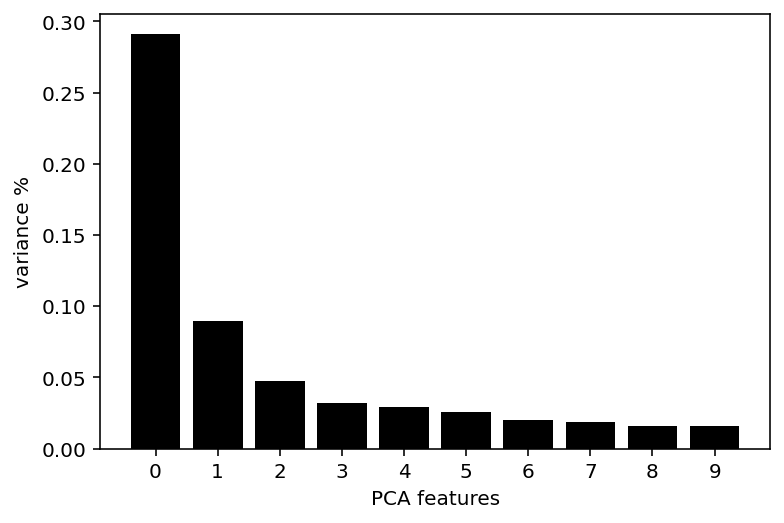

In [109]:
# Imports
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Load in the data
df = cosine_similarity(matrix, matrix)
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)
# Create a PCA instance: pca
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Here we see a variance drop after the first component.

Text(0, 0.5, 'PCA 2')

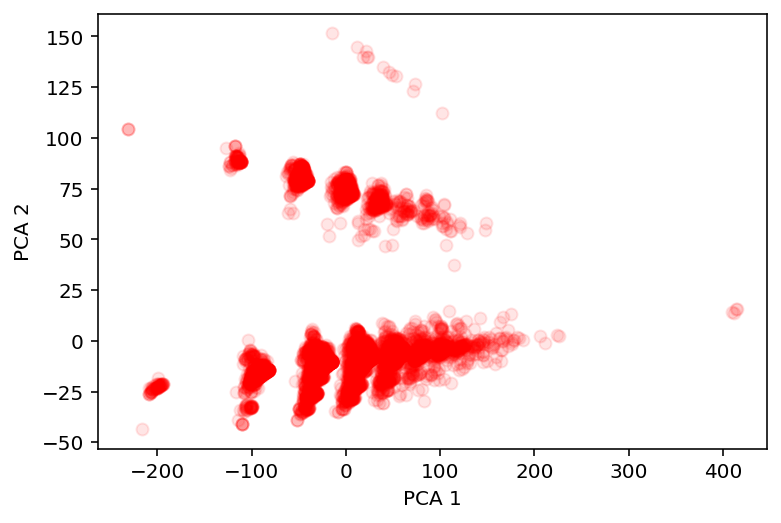

In [110]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

We must find the sum of squared distances of samples to their closest cluster center to determine the optimal clustering.

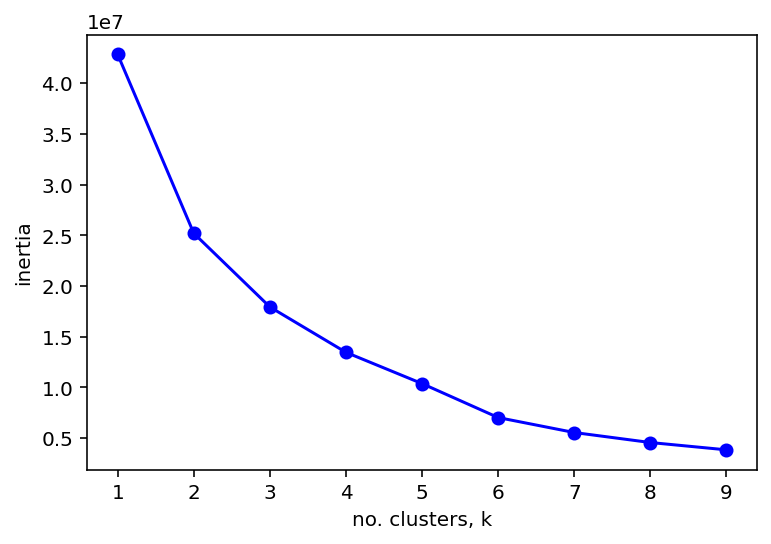

In [111]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='blue')
plt.xlabel('no. clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

We see an elbow point at around 2 clusters. We will use 2 clusters as our optimal number of clusters.

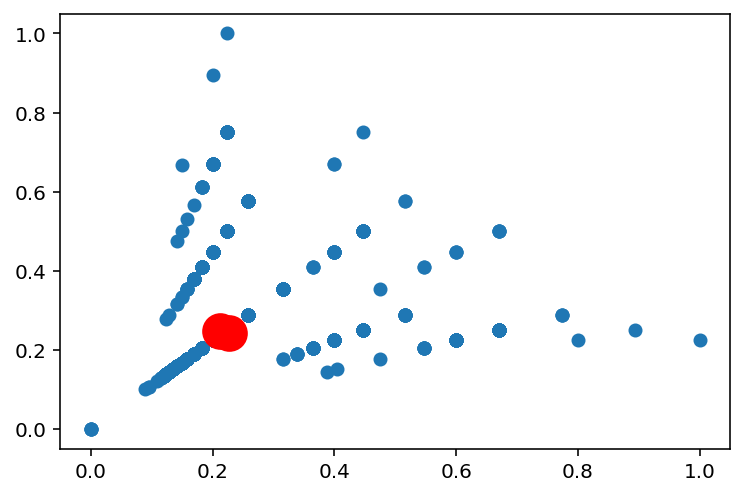

In [112]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
plt.scatter(df[:,0], df[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

## Matthew edit this box and please write the analysis here. ##




## Predicting Nouns by adding a new Caption and removing a Noun with Cosine Similarity##

*Add a new caption, remove a noun and see if our model can predict the possible noun associated with that catption* 

Code 


## Matthew edit this box and please write the analysis here. ##